# Tugas Besar IF2220 Probabilitas dan Statistika
### Penarikan Kesimpulan dan Pengujian Hipotesis


### Author
- Vieri Fajar Firdaus / 13521099
- Saddam Annais Shaquille / 13521121

### Inisialisasi library dan data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
from scipy import stats
anggur = pd.read_csv('anggur.csv')
anggur.head(100)
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

### Data Description
- Fixed acidity (keasaman tetap): jumlah asam yang terkandung dalam anggur yang tidak mudah menguap.
- Volatile acidity (keasaman mudah menguap): jumlah asam yang terkandung dalam anggur yang mudah menguap.
- Citric acid (asam sitrat): jumlah asam sitrat yang terkandung dalam anggur.
- Residual sugar (gula sisa): jumlah gula yang tersisa setelah fermentasi selesai.
- Chlorides (klorida): jumlah garam klorida yang terkandung dalam anggur.
- Free sulfur dioxide (sulfur dioksida bebas): jumlah sulfur dioksida bebas yang terkandung dalam anggur.
- Total sulfur dioxide (total sulfur dioksida): jumlah sulfur dioksida total yang terkandung dalam anggur.
- Density (densitas): berat relatif anggur dibandingkan dengan air murni pada 20 derajat Celsius.
- pH: tingkat keasaman pada skala 0 hingga 14.
- Sulphates (sulfat): jumlah sulfat yang terkandung dalam anggur.
- Alcohol (alkohol): persentase alkohol dalam anggur.
- Quality (kualitas): skor kualitas antara 0 dan 10 berdasarkan data sensorik.

### 1. Menuliskan deskripsi statistika (*descriptive statistics*) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR (*interquartile range*), *skewness*, dan *kurtosis*.

In [2]:
#untuk mengetahui tipe data dari setiap kolom
display(Markdown('**Tipe data setiap kolom**'))
anggur.info()

**Tipe data setiap kolom**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [3]:
def info(column):
    display(Markdown('**Deskripsi statistik kolom {}**'.format(column)))
    print('Mean\t\t\t:', anggur[column].mean())
    print('Median\t\t\t:', anggur[column].median())
    mode=anggur[column].mode()
    if(len(mode)==len(anggur)):
        print('Modus\t\t\t: Seluruh data merupakan modus')
    else :
        value=""
        for i in range(len(mode)):
            if(i==len(mode)-1):
                value=value+str(mode[i])
            else:
                value=value+str(mode[i])+", "
                
        print('Modus\t\t\t:',value)
    print('Standar Deviasi\t\t:', anggur[column].mode()[0])
    print('Range\t\t\t:', anggur[column].max() - anggur[column].min())
    print('Kuartil 1\t\t:', anggur[column].quantile(0.25))
    print('Kuartil 2\t\t:', anggur[column].quantile(0.5))
    print('Kuartil 3\t\t:', anggur[column].quantile(0.75))
    print('Interquartile Range\t:', anggur[column].quantile(0.75) - anggur[column].quantile(0.25))
    print('Skewness\t\t:', anggur[column].skew())
    print('Kurtosis\t\t:', anggur[column].kurtosis())


In [4]:
info(columns[0])

**Deskripsi statistik kolom fixed acidity**

Mean			: 7.15253
Median			: 7.15
Modus			: 6.54
Standar Deviasi		: 6.54
Range			: 8.17
Kuartil 1		: 6.3775
Kuartil 2		: 7.15
Kuartil 3		: 8.0
Interquartile Range	: 1.6224999999999996
Skewness		: -0.028878575532660055
Kurtosis		: -0.019292120932933532


In [5]:
info(columns[1])

**Deskripsi statistik kolom volatile acidity**

Mean			: 0.5208385000000001
Median			: 0.52485
Modus			: 0.5546
Standar Deviasi		: 0.5546
Range			: 0.6652
Kuartil 1		: 0.4561
Kuartil 2		: 0.52485
Kuartil 3		: 0.5853750000000001
Interquartile Range	: 0.12927500000000008
Skewness		: -0.1976986986092083
Kurtosis		: 0.16185290336961788


In [6]:
info(columns[2])

**Deskripsi statistik kolom citric acid**

Mean			: 0.27051699999999995
Median			: 0.2722
Modus			: 0.3019
Standar Deviasi		: 0.3019
Range			: 0.29290000000000005
Kuartil 1		: 0.2378
Kuartil 2		: 0.2722
Kuartil 3		: 0.302325
Interquartile Range	: 0.064525
Skewness		: -0.045576058685017296
Kurtosis		: -0.1046792495951605


In [7]:
info(columns[3])

**Deskripsi statistik kolom residual sugar**

Mean			: 2.5671036825067595
Median			: 2.519430272865794
Modus			: Seluruh data merupakan modus
Standar Deviasi		: 0.032554525015195
Range			: 5.5182004097078625
Kuartil 1		: 1.8963299434886831
Kuartil 2		: 2.519430272865794
Kuartil 3		: 3.220873482829786
Interquartile Range	: 1.324543539341103
Skewness		: 0.13263808618992312
Kurtosis		: -0.04298003436476261


In [8]:
info(columns[4])

**Deskripsi statistik kolom chlorides**

Mean			: 0.08119515250784977
Median			: 0.0821669021645236
Modus			: Seluruh data merupakan modus
Standar Deviasi		: 0.0151224391657095
Range			: 0.1256351302653488
Kuartil 1		: 0.06657363190977357
Kuartil 2		: 0.0821669021645236
Kuartil 3		: 0.09531150148556258
Interquartile Range	: 0.028737869575789013
Skewness		: -0.05131929742072573
Kurtosis		: -0.2465081359240382


In [9]:
info(columns[5])

**Deskripsi statistik kolom free sulfur dioxide**

Mean			: 14.907679251029796
Median			: 14.860346236568924
Modus			: Seluruh data merupakan modus
Standar Deviasi		: 0.194678523326937
Range			: 27.26784690109891
Kuartil 1		: 11.426716949457619
Kuartil 2		: 14.860346236568924
Kuartil 3		: 18.313097915395005
Interquartile Range	: 6.886380965937386
Skewness		: 0.007130415991143398
Kurtosis		: -0.36496364342685306


In [10]:
info(columns[6])

**Deskripsi statistik kolom total sulfur dioxide**

Mean			: 40.290150000000004
Median			: 40.19
Modus			: 35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51
Standar Deviasi		: 35.2
Range			: 66.80999999999999
Kuartil 1		: 33.785000000000004
Kuartil 2		: 40.19
Kuartil 3		: 47.0225
Interquartile Range	: 13.237499999999997
Skewness		: -0.024060026812269975
Kurtosis		: 0.06394978916172311


In [11]:
info(columns[7])

**Deskripsi statistik kolom density**

Mean			: 0.9959253000000001
Median			: 0.996
Modus			: 0.9959, 0.9961, 0.9965, 0.997
Standar Deviasi		: 0.9959
Range			: 0.013799999999999923
Kuartil 1		: 0.9946
Kuartil 2		: 0.996
Kuartil 3		: 0.9972
Interquartile Range	: 0.0025999999999999357
Skewness		: -0.07688278915513917
Kurtosis		: 0.01636562128503849


In [12]:
info(columns[8])

**Deskripsi statistik kolom pH**

Mean			: 3.30361
Median			: 3.3
Modus			: 3.34
Standar Deviasi		: 3.34
Range			: 0.7399999999999998
Kuartil 1		: 3.23
Kuartil 2		: 3.3
Kuartil 3		: 3.37
Interquartile Range	: 0.14000000000000012
Skewness		: 0.14767259510827038
Kurtosis		: 0.0809095518741838


In [13]:
info(columns[9])

**Deskripsi statistik kolom sulphates**

Mean			: 0.5983899999999999
Median			: 0.595
Modus			: 0.59
Standar Deviasi		: 0.59
Range			: 0.6699999999999999
Kuartil 1		: 0.53
Kuartil 2		: 0.595
Kuartil 3		: 0.67
Interquartile Range	: 0.14
Skewness		: 0.1491989008699043
Kurtosis		: 0.06481928180859686


In [14]:
info(columns[9])

**Deskripsi statistik kolom sulphates**

Mean			: 0.5983899999999999
Median			: 0.595
Modus			: 0.59
Standar Deviasi		: 0.59
Range			: 0.6699999999999999
Kuartil 1		: 0.53
Kuartil 2		: 0.595
Kuartil 3		: 0.67
Interquartile Range	: 0.14
Skewness		: 0.1491989008699043
Kurtosis		: 0.06481928180859686


In [15]:
info(columns[10])

**Deskripsi statistik kolom alcohol**

Mean			: 10.592279999999999
Median			: 10.61
Modus			: 9.86, 10.31
Standar Deviasi		: 9.86
Range			: 8.989999999999998
Kuartil 1		: 9.56
Kuartil 2		: 10.61
Kuartil 3		: 11.6225
Interquartile Range	: 2.0625
Skewness		: -0.01899140432111647
Kurtosis		: -0.13173155932281988


In [16]:
info(columns[11])

**Deskripsi statistik kolom quality**

Mean			: 7.958
Median			: 8.0
Modus			: 8
Standar Deviasi		: 8
Range			: 5
Kuartil 1		: 7.0
Kuartil 2		: 8.0
Kuartil 3		: 9.0
Interquartile Range	: 2.0
Skewness		: -0.08905409122491781
Kurtosis		: 0.10829100232871003


### 2. Membuat Visualisasi plot distribusi dalam bentuk histogram dan boxplot untuk setiap kolom numerik.

In [17]:
# Make a function to show the histogram and box plots
def hist_box_plot(df: pd.DataFrame, column: str) -> None:
  fig, (ax1, ax2) =plt.subplots(nrows = 2, ncols = 1, figsize=(10, 5), sharex=True)
  g1 = sns.histplot(data = df, x = column, ax=ax1, color="#03C988", kde = True, line_kws={"linewidth": 1.5, "alpha": 1})
  g1.lines[0].set_color('#DF7857')
  g2 = sns.boxplot(data = df, x = column, ax=ax2, color="#03C988", flierprops={"marker":'o', "markersize":5, "markeredgecolor":'black', "markerfacecolor":'white', "alpha":0.6})
  g1.set(xlabel=None)
  g1.set(ylabel=None)
  g2.set(xlabel=None)
  g2.set(ylabel=None)
  fig.suptitle(column, y = 0.95, fontsize = 17)

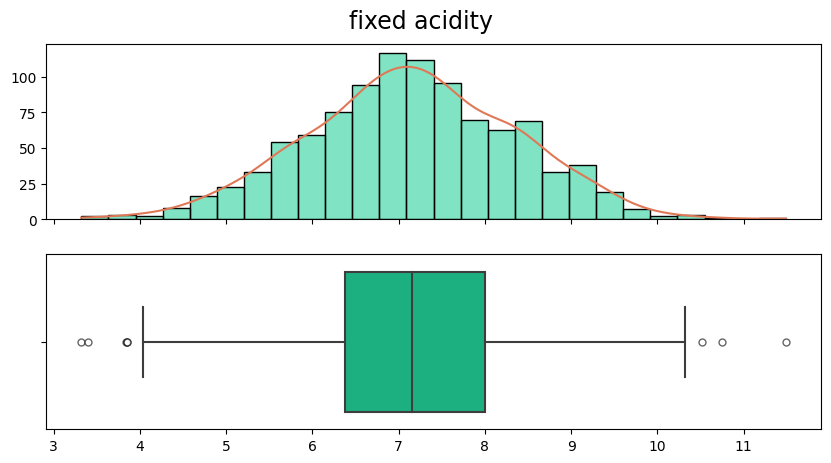

In [18]:
# Untuk kolom fixed acidity
hist_box_plot(anggur, anggur.columns[0])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan condong kiri (*negative skewed*) yang hampir tidak terlihat. 
- Berdasarkan boxplot, terlihat bahwa data fix acidity sangat beragam dengan nilai minimumnya hampir mendekati 4 dan maksimumnya melebihi 10 serta mediannya sedikit di atas 7
- Terdapat beberapa *outliers* yang terlihat di bawah nilai minimum maupun di atas nilai maksimum. 

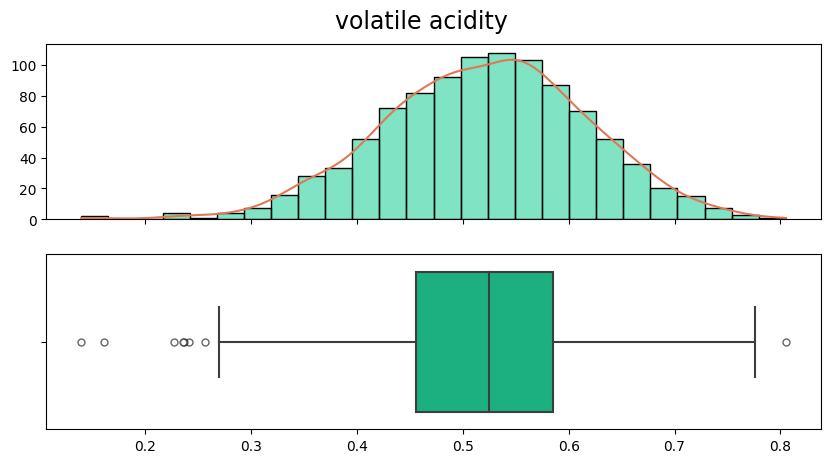

In [19]:
# Untuk kolom volatile acidity
hist_box_plot(anggur, anggur.columns[1])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kanan (*positive skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *volatile acidity* memiliki rentang yang cukup kecil.
- Nilai minimumnya kurang dari 0.3 dan maksimumnya kurang dari 0.8 serta mediannya sedikit di atas 0.5.
- Terdapat 1 *outliers* yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum. 

p = 0.930858
H0 tidak bisa ditolak, tidak normal


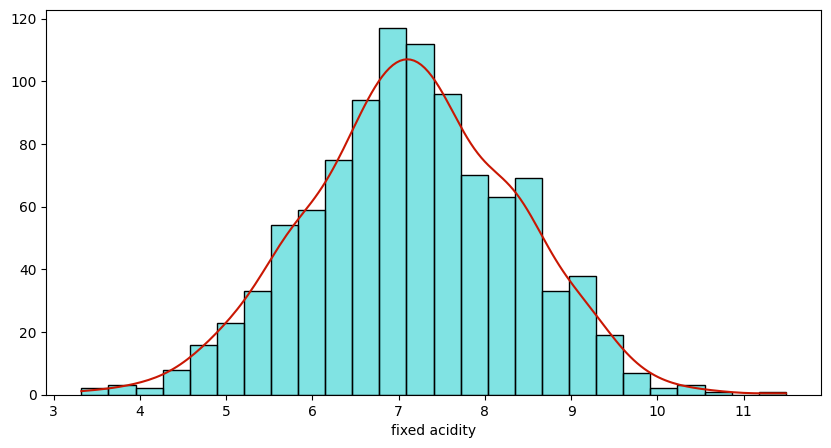

In [45]:
def normality(column):
    k2,p = stats.normaltest(anggur[column])
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("H0 ditolak, normal")
    else:
        print("H0 tidak bisa ditolak, tidak normal")
    fig, ax1 =plt.subplots(nrows=1,ncols = 1, figsize=(10, 5), sharex=True)
    g1 = sns.histplot(data = anggur, x = column, ax=ax1, color="#03c9c9", kde = True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#c91703')
    g1.set(ylabel=None)
normality(columns[1])
